In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [18]:
df = pd.read_csv("C:/Users/DSC-GDP075/Documents/SADiabites.csv")
df = df.replace("-", np.nan)
year = ['2000', '2011', '2024']
df[year] = df[year].replace(" -", np.nan).apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df[year] = df[year].apply(pd.to_numeric, errors='coerce')
#df[year] = df[year].apply(pd.to_numeric)
df.head()

,Indicator,2000,2011,2024,2050
0,People with diabetes (1000s),996.7,2759.6,5344.6,9474
1,Age-standardised prevalence of diabetes %,NaN,19.6,23.1,25.4
2,Proportion undiagnosed %,NaN,NaN,43.6,NaN
3,Undiagnosed people (1000s),NaN,NaN,2330.2,NaN
4,People with IFG (1000s),NaN,NaN,3793.1,5319.6


In [19]:
# preparing for the analysis 
df_long = df.melt(id_vars="Indicator", 
                  value_vars= year, 
                  var_name="Year", 
                  value_name="Value")

df_long["Year"] = df_long["Year"].astype(int)
df_long.tail()


,Indicator,Year,Value
43,Health expenditure per person USD,2024,1372.5
44,Type 1 diabetes (all ages),2024,222942.0
45,Type 1 diabetes (0-19y),2024,46468.9
46,Adult population (1000s),2024,24983.1
47,Population age 0-19,2024,10525192.0


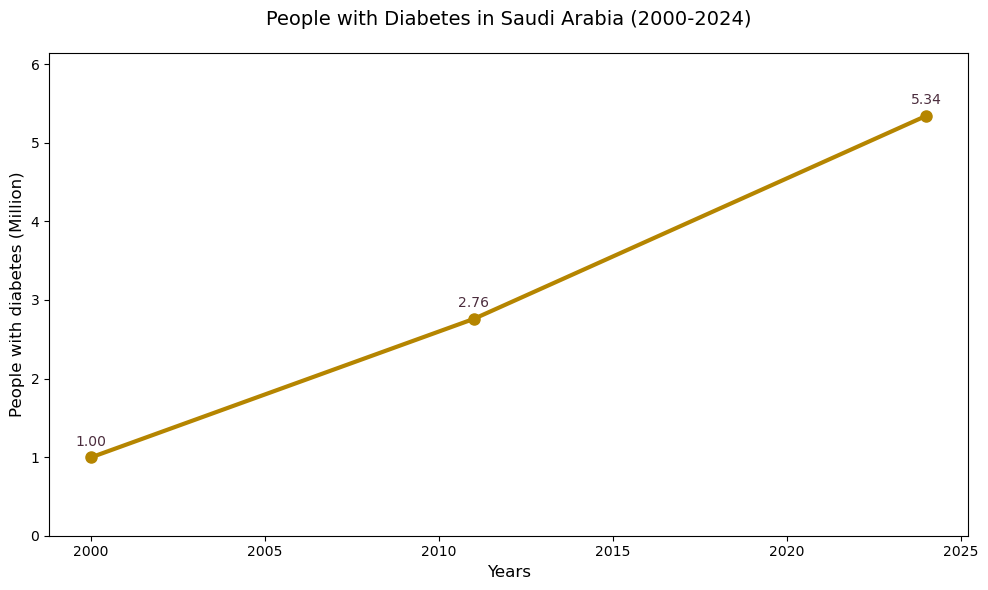

In [20]:
#ppl with diabites in ksa 
plt.figure(figsize=(10, 6))

subset_diab_people = df_long[df_long["Indicator"] == "People with diabetes (1000s)"].copy()

subset_diab_people["Value"] = pd.to_numeric(subset_diab_people["Value"], errors='coerce')
subset_diab_people = subset_diab_people.dropna(subset=["Value"])

# Convert from thousands to millions
subset_diab_people["Value_million"] = subset_diab_people["Value"] / 1000

plt.plot(subset_diab_people["Year"], subset_diab_people["Value_million"], marker="o", color="#B58500", linewidth=3, markersize=8)
plt.title("People with Diabetes in Saudi Arabia (2000-2024)", fontsize=14, pad=20)
plt.xlabel("Years", fontsize=12)
plt.ylabel("People with diabetes (Million)", fontsize=12)

y_max_people = subset_diab_people["Value_million"].max()
plt.ylim(0, y_max_people * 1.15)

for x, y in zip(subset_diab_people["Year"], subset_diab_people["Value_million"]):
    plt.text(x, y + y_max_people*0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=10, color="#4B2C3D")

plt.tight_layout()
plt.show()


In [21]:
diab = df.set_index("Indicator").loc["People with diabetes (1000s)"]
growth = ((diab["2024"] - diab["2000"]) / diab["2000"]) * 100
print("Growth rate from 2000 to 2024:", round(growth, 2), "%")
####### Great Insights Growth from 2000 to 2024: 436.23 %

Growth rate from 2000 to 2024: 436.23 %


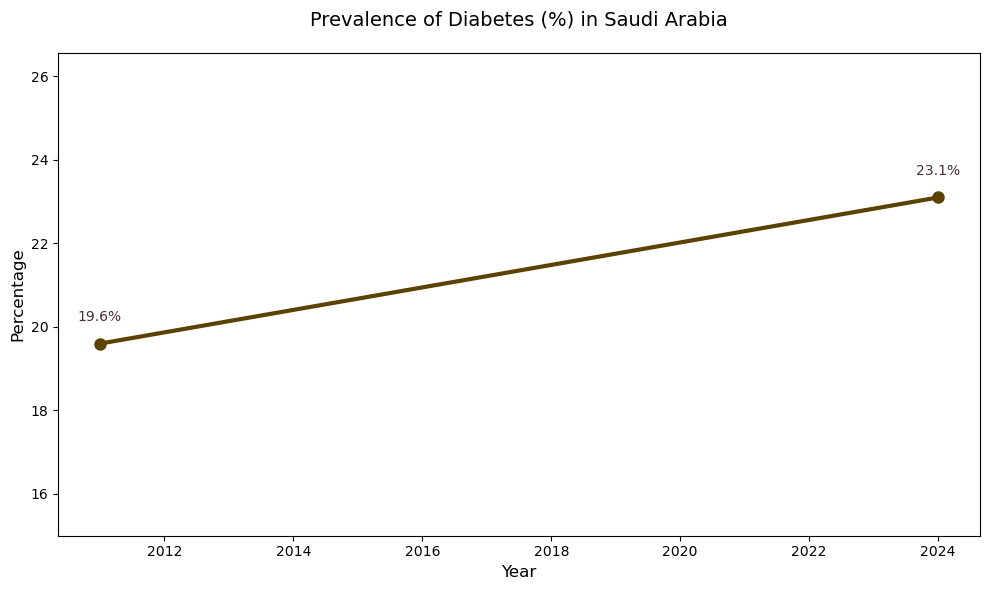

In [22]:

subset = df_long[df_long["Indicator"] == "Age-standardised prevalence of diabetes %"].copy()

# Convert to numeric and drop missing values
subset["Value"] = pd.to_numeric(subset["Value"], errors='coerce')
subset = subset.dropna(subset=["Value"])

plt.figure(figsize=(10, 6))
plt.plot(subset["Year"], subset["Value"], marker="o", color="#5B4200", linewidth=3, markersize=8)

plt.title("Prevalence of Diabetes (%) in Saudi Arabia", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

y_max_prev = subset["Value"].max()
plt.ylim(15, y_max_prev * 1.15)

for x, y in zip(subset["Year"], subset["Value"]):
    plt.text(x, y + y_max_prev*0.02, f"{y:.1f}%", ha='center', va='bottom', fontsize=10, color="#4B2C3D")

plt.tight_layout()
plt.show()


In [23]:
undiag_rate = df.set_index("Indicator").loc["Proportion undiagnosed %", "2024"]
undiag_pop = df.set_index("Indicator").loc["Undiagnosed people (1000s)", "2024"]
print("Percentage of Undiagnosed people in 2024:", undiag_rate, "%")
print("Number of Undiagnosed people in 2024 (Million):", f"{undiag_pop: ,}")

Percentage of Undiagnosed people in 2024: 43.6 %
Number of Undiagnosed people in 2024 (Million):  2,330.2


In [24]:
deaths = df.set_index("Indicator").loc["Diabetes deaths", "2011"]
population = df.set_index("Indicator").loc["Adult population (1000s)", "2011"]

death_rate = deaths / (population)*100
print("Death rate in 2011 because of diabities:", death_rate, "%")

#################################################################

deaths = df.set_index("Indicator").loc["Diabetes deaths", "2024"]
population = df.set_index("Indicator").loc["Adult population (1000s)", "2024"]

death_rate = deaths / (population)*100
print("Death rate in 2024 because of diabities:", death_rate, "%")

Death rate in 2011 because of diabities: 90.45890314394474 %
Death rate in 2024 because of diabities: 32.17495026638007 %


In [25]:

year = ["2011", "2024"]
prev = df.set_index("Indicator").loc["Age-standardised prevalence of diabetes %"][year].astype(float)
exp_usd = df.set_index("Indicator").loc["Health expenditure per person USD"][year]
exp_sar = exp_usd.astype(float) * 3.75

comparison = pd.DataFrame({
    "Year": year,
    "Prevalence (%)": prev.values,
    "Expenditure per person (SAR)": exp_sar.values
})

print(comparison)



   Year  Prevalence (%)  Expenditure per person (SAR)
0  2011            19.6                      3742.500
1  2024            23.1                      5146.875


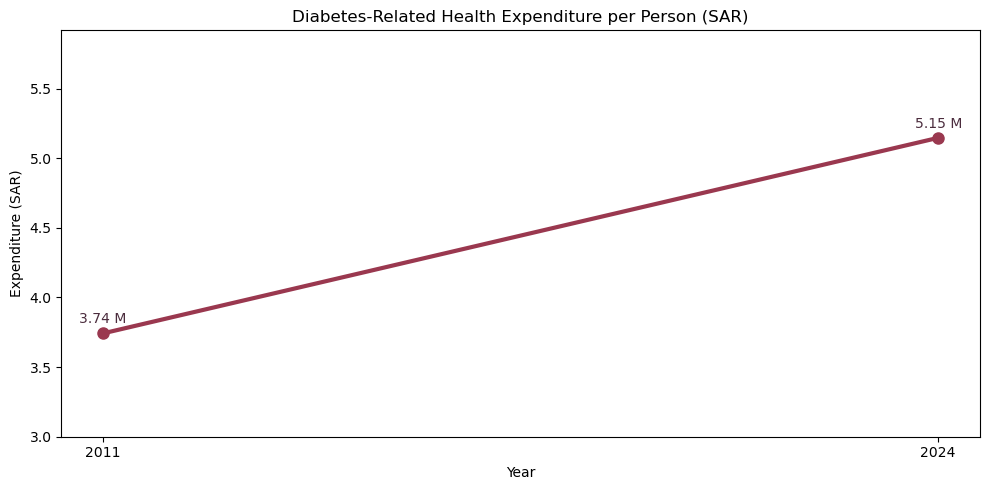

In [26]:
plt.figure(figsize=(10,5))
lines=plt.plot(year, exp_sar.values, marker="o", linewidth=3, color="#9A384F", markersize= 8)
plt.title("Diabetes-Related Health Expenditure per Person (SAR)")
plt.xlabel("Year")
plt.ylabel("Expenditure (SAR)")
#plt.grid(True)
y_max = max(exp_sar.values)

# point labels you already used (convert values for display)
for x, y in zip(year, exp_sar.values):
    plt.text(x, y + y_max*0.01, f"{y/1000:.2f} M", ha='center', va='bottom', fontsize=10, color="#4B2C3D")

# Format y-axis ticks to show "X.X M" (divide by 1000)
ax = plt.gca()

def millions_formatter(x, pos):
    # x is in the original units; divide by 1000 to get "millions" as you requested
    return f"{x/1000:.1f}"

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.ylim(3000, y_max * 1.15)
plt.tight_layout()
plt.show()



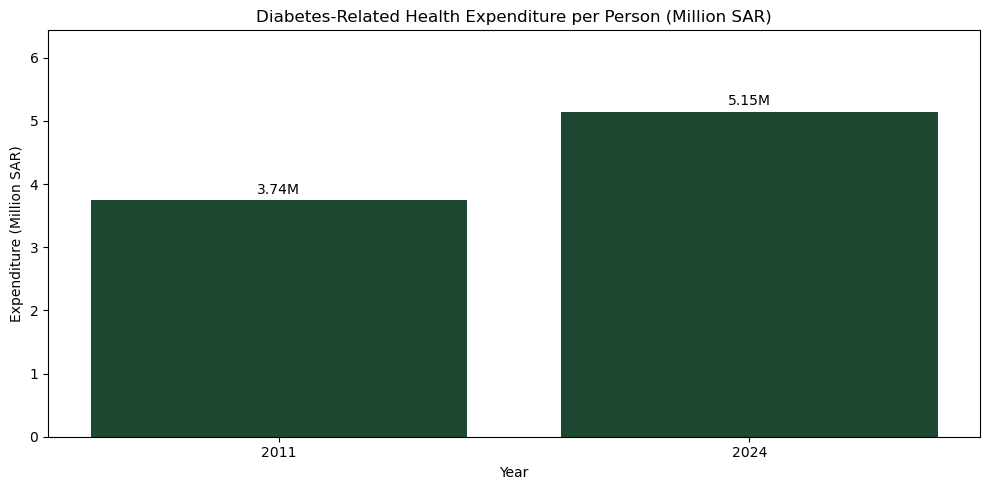

In [27]:
plt.figure(figsize=(10,5))
exp_sar_m = exp_sar.values / 1000
barr = plt.bar(year, exp_sar_m, color="#1D4831")
plt.title("Diabetes-Related Health Expenditure per Person (Million SAR)")
plt.xlabel("Year")
plt.ylabel("Expenditure (Million SAR)")

for i in barr:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2, height + 0.05, f"{height:.2f}M", 
             ha='center', va='bottom', fontsize=10, clip_on=False)

plt.ylim(0, max(exp_sar_m) * 1.25) 
plt.tight_layout()
plt.show()


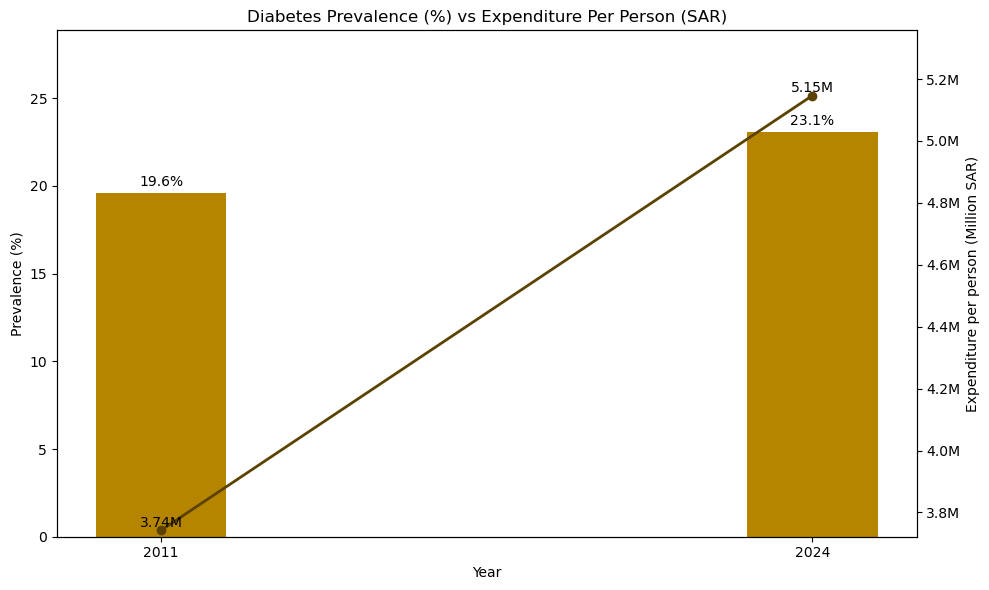

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# BAR - prevalence
bars = ax1.bar(year, prev, label="Diabetes Prevalence (%)", color="#B58500", width=0.2) 
ax1.set_xlabel("Year")
ax1.set_ylabel("Prevalence (%)", color="black")
ax1.tick_params(axis="y", labelcolor="black")

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.2, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=10, clip_on=False)

ax1.set_ylim(0, max(prev) * 1.25)  

ax2 = ax1.twinx()
exp_sar_m = [v / 1000 for v in exp_sar] 

ax2.plot(year, exp_sar_m, marker="o", linewidth=2, label="Expenditure Per Person (M SAR)", color="#5B4200")
ax2.set_ylabel("Expenditure per person (Million SAR)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

min_exp, max_exp = min(exp_sar_m), max(exp_sar_m)
pad = (max_exp - min_exp) * 0.15 if (max_exp - min_exp) != 0 else max_exp * 0.1
ax2.set_ylim(min_exp - pad*0.1, max_exp + pad)

import matplotlib.ticker as mticker
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x:.1f}M"))

for x, y in zip(year, exp_sar_m):
    ax2.text(x, y + pad*0.05, f"{y:.2f}M", ha='center', fontsize=10, clip_on=False)

fig.subplots_adjust(top=0.92)
plt.title("Diabetes Prevalence (%) vs Expenditure Per Person (SAR)")
plt.tight_layout()  
plt.show()


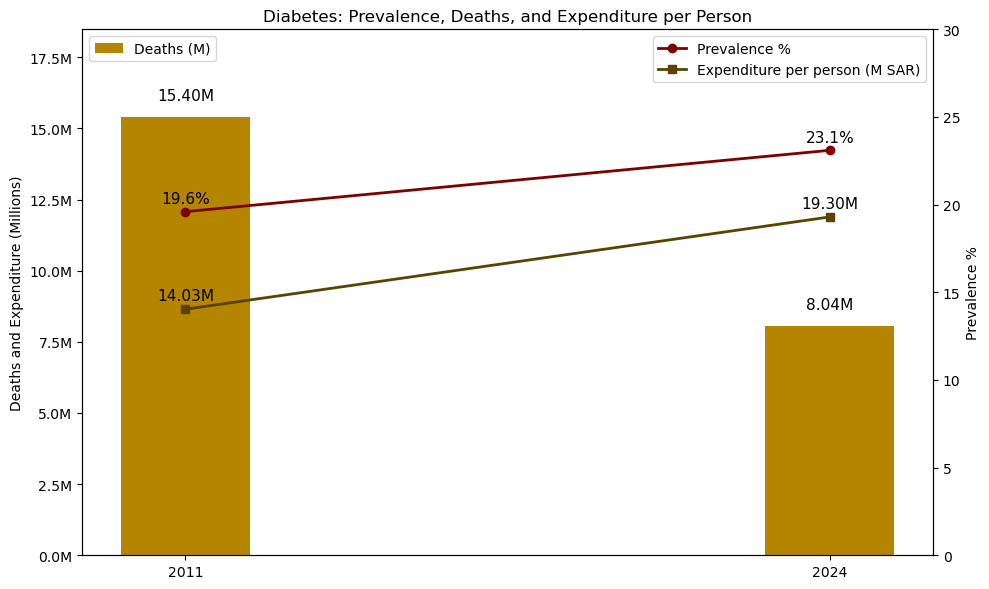

In [29]:
years = ['2011', '2024']
prevalence = np.array([19.6, 23.1])        
deaths = np.array([15399.0, 8038.3])        
expenditure_usd = np.array([3742.5, 5146.875])  

expenditure_sar = expenditure_usd * 3.75
expenditure_m = expenditure_sar / 1_000   # in millions

# Bar
fig, ax1 = plt.subplots(figsize=(10,6))
bars = ax1.bar(years, deaths / 1_000, color="#B58500", label='Deaths (M)', width=0.2)

# Add bar labels
for bar in bars:
    h = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        h + 0.5,  # offset above bar
        f"{h:.2f}M",
        ha='center', va='bottom', fontsize=11)

# Set left y-axis label
ax1.set_ylabel("Deaths and Expenditure (Millions)")

# Format left y-axis in millions
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.1f}M"))

# Lines
ax2 = ax1.twinx()
plt.subplots_adjust(top=0.99)

# Prevalence line
ax2.plot(years, prevalence, marker='o', color="#7F0000", linewidth=2, label='Prevalence %')
for i, v in enumerate(prevalence):
    ax2.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=11, color='black')

# Expenditure line
ax2.plot(years, expenditure_m, marker='s', linewidth=2, color="#5B4200", label='Expenditure per person (M SAR)')
for i, v in enumerate(expenditure_m):
    ax2.text(i, v + 0.5, f"{v:.2f}M", ha='center', fontsize=11, color='black')

# Set right y-axis limits and label
ax2.set_ylim(0, 30)
ax2.set_ylabel("Prevalence %")

# Title and legends
ax1.set_title("Diabetes: Prevalence, Deaths, and Expenditure per Person")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust left y-axis limits slightly higher for space above bar labels
ax1.set_ylim(0, max(deaths)/1_000 * 1.2)  # 20% extra space

plt.tight_layout()
plt.show()

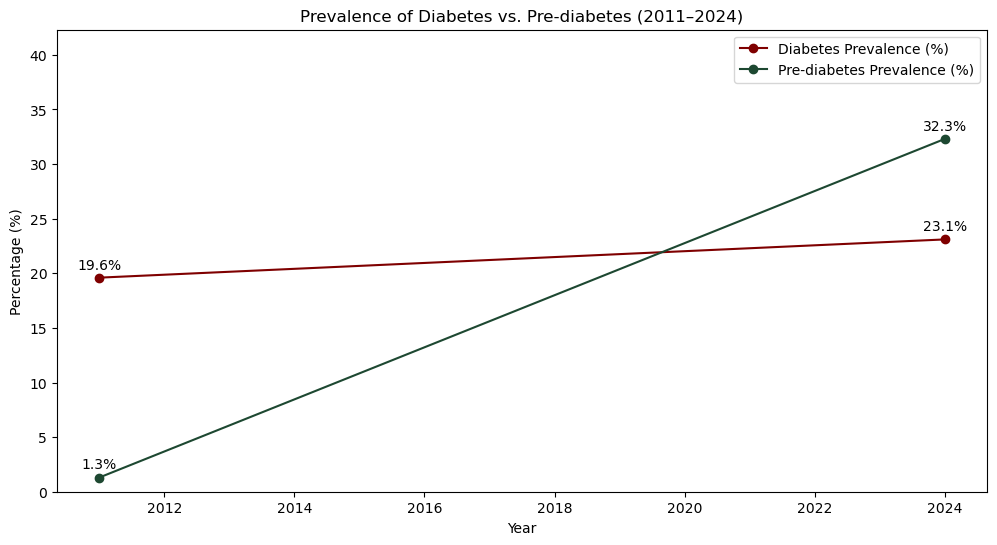

In [31]:

df_pct = df[df["Indicator"].isin([
    "Age-standardised prevalence of diabetes %",
    "Prevalence of IFG %",
    "Prevalence of IGT %"
])].copy()


df_long = df_pct.melt(id_vars="Indicator", 
                      var_name="Year", 
                      value_name="Value")

df_long["Year"] = df_long["Year"].astype(int)

df_long = df_long[df_long["Year"].isin([2011, 2024])]


dia = df_long[df_long["Indicator"] == "Age-standardised prevalence of diabetes %"].dropna()

combined = df_long[df_long["Indicator"]
                   .isin(["Prevalence of IFG %",
                          "Prevalence of IGT %"])] \
                     .groupby("Year", as_index=False)["Value"].sum()


plt.figure(figsize=(12,6))
plt.plot(dia["Year"], dia["Value"], marker="o", color="#7F0000", label="Diabetes Prevalence (%)")
plt.plot(combined["Year"], combined["Value"], marker="o",color="#1D4831", label="Pre-diabetes Prevalence (%)")

# Add labels above points with spacing
for x, y in zip(dia["Year"], dia["Value"]):
    plt.text(x, y + 0.8, f"{y:.1f}%", ha="center")

for x, y in zip(combined["Year"], combined["Value"]):
    plt.text(x, y + 0.8, f"{y:.1f}%", ha="center")

plt.ylim(0, max(dia["Value"].max(), combined["Value"].max()) + 5)  # extra space on top
plt.title("Prevalence of Diabetes vs. Pre-diabetes (2011–2024)")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")

plt.ylim(0, max(dia["Value"].max(), combined["Value"].max()) +10)

#plt.grid(True)
plt.legend()

plt.show()


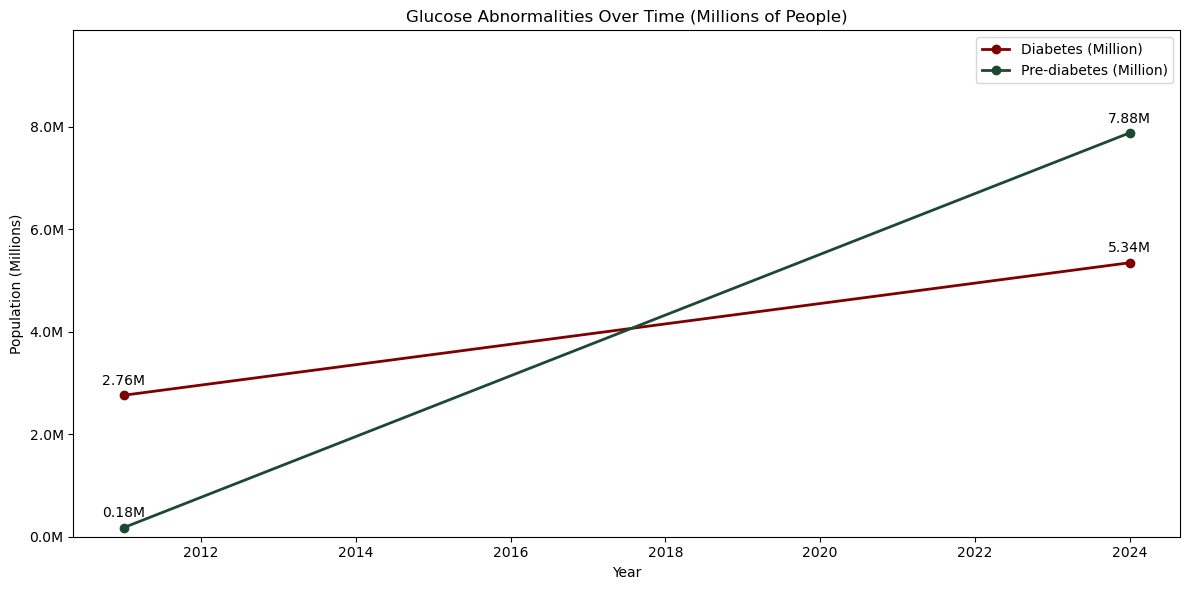

In [32]:
df_clone = df.copy()

df_long_clone = df_clone.melt(
    id_vars="Indicator",  
    var_name="Year",      
    value_name="Value"    
)


df_long_clone["Year"] = df_long_clone["Year"].astype(int)
df_long_clone["Value"] = pd.to_numeric(df_long_clone["Value"], errors='coerce')


df_diab_clone = df_long_clone[
    (df_long_clone["Indicator"] == "People with diabetes (1000s)") &
    (df_long_clone["Year"].between(2010, 2024))
].copy()
df_diab_clone["Value_M"] = df_diab_clone["Value"] / 1000  


df_pre_diab_clone = df_long_clone[
    (df_long_clone["Indicator"].isin(["People with IFG (1000s)", "People with IGT (1000s)"])) &
    (df_long_clone["Year"].between(2010, 2024))
].copy()

df_pre_diab_pivot = df_pre_diab_clone.pivot(index="Year", columns="Indicator", values="Value").fillna(0)
df_pre_diab_pivot["Value_M"] = df_pre_diab_pivot.sum(axis=1) / 1000  # convert to millions

df_pre_diab_plot = df_pre_diab_pivot.reset_index()[["Year", "Value_M"]]

plt.figure(figsize=(12,6))

plt.plot(df_diab_clone["Year"], df_diab_clone["Value_M"], marker="o", linewidth=2, color="#7F0000",label="Diabetes (Million)")

plt.plot(df_pre_diab_plot["Year"], df_pre_diab_plot["Value_M"], marker="o", linewidth=2, color="#1D4831", label="Pre-diabetes (Million)")

for x, y in zip(df_diab_clone["Year"], df_diab_clone["Value_M"]):
    plt.text(x, y + 0.2, f"{y:.2f}M", ha="center", fontsize=10)

for x, y in zip(df_pre_diab_plot["Year"], df_pre_diab_plot["Value_M"]):
    plt.text(x, y + 0.2, f"{y:.2f}M", ha="center", fontsize=10)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x:.1f}M"))

plt.title("Glucose Abnormalities Over Time (Millions of People)")
plt.xlabel("Year")
plt.ylabel("Population (Millions)")

y_max = max(df_diab_clone["Value_M"].max(), df_pre_diab_plot["Value_M"].max())
plt.ylim(0, y_max + 2)  


plt.legend()
plt.tight_layout()
plt.show()
